In [50]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import pandas_datareader.data as web

In [122]:
sns.set_style('darkgrid')
pd.plotting.register_matplotlib_converters()
sns.mpl.rc('figure', figsize=(15,7))
plt.style.use('ggplot')

## Getting Growth Metrics (Stock Returns)

In [51]:
FB = web.DataReader('FB', 'yahoo', start='2017-09-18')

In [52]:
FB

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-09-18,172.070007,169.339996,171.990005,170.009995,12954000,170.009995
2017-09-19,172.559998,170.360001,170.619995,172.520004,13168600,172.520004
2017-09-20,173.050003,170.699997,172.500000,172.169998,12264100,172.169998
2017-09-21,172.270004,170.009995,171.690002,171.110001,11161400,171.110001
2017-09-22,171.729996,169.220001,170.210007,170.539993,12097100,170.539993
...,...,...,...,...,...,...
2021-05-03,328.549988,321.839996,326.170013,322.579987,18719500,322.579987
2021-05-04,322.190002,313.119995,320.019989,318.359985,24032600,318.359985
2021-05-05,321.059998,314.489990,318.190002,315.019989,15577600,315.019989


In [55]:
def log_returns(prices):
    returns = []
    returns.append(0)
    for i in range(1,len(prices)):
        r = prices[i-1]/prices[i]
        returns.append(r)
    returns = np.log(returns)
    
    return returns

In [62]:
fb_returns = log_returns(FB['Adj Close'])
FB['daily_returns'] = fb_returns

<ipython-input-55-cdf2d3244229>:7: RuntimeWarning: divide by zero encountered in log
  returns = np.log(returns)


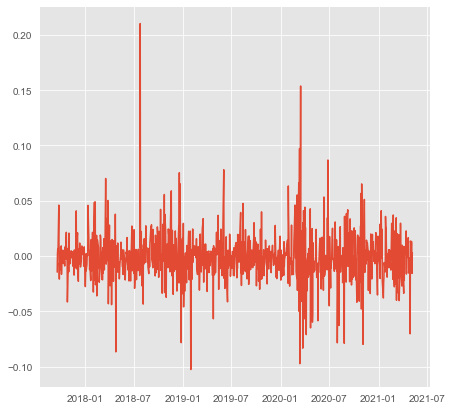

In [63]:
plt.plot(FB['daily_returns'][1:])

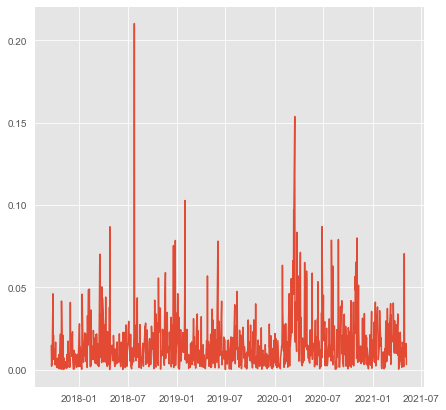

In [64]:
plt.plot(abs(FB['daily_returns'][1:]))

## Exploring Sentiment Data Source

### AppStore Reviews

In [65]:
fb_reviews = pd.read_csv("../data_extraction/reviews_facebook_appstore_cleaned.csv")

In [66]:
fb_reviews

,date,review,title,isEdited,rating,userName,cleaned_reviews
0,2017-09-18 00:11:58,"Of the features I use, the most notable change...","Found the ""Log Out"" in new version",False,3,King of Bizarkia,of featur use most notabl chang is locat of lo...
1,2017-09-18 00:36:35,I have tried everything I could find online to...,iPhone 7plus can't update to new vet,False,2,Laceylboyer,have tri everyth could find onlin to updat my ...
2,2017-09-18 02:06:11,Over the past few years the app has improved d...,Facebook app is so broken,False,2,Humptybump,over past few year app has improv dramat it is...
3,2017-09-18 04:48:53,Most of the time I'm usually on my phone when ...,Facebook and iPhone,False,5,G-Neva,most of time am usual on my phone when use fb ...
4,2017-09-18 05:06:14,Most helpful app. Updated with everything happ...,Updated with everything,False,5,TheBenchBrat,most help app updat with everyth happen in world
...,...,...,...,...,...,...,...
24155,2021-05-02 03:53:24,"First, Instagram (Facebook owned) deleted my p...",Constant App Login Issues,False,1,bethladd015,first instagram facebook own delet my profil w...
24156,2021-05-02 08:07:40,"Yes, use our built in browser you can’t disabl...",No direct way to view browsing history,False,1,トラクイイ,yes use our built in browser you can ’ t disab...
24157,2021-05-02 09:47:56,I really only love the groups for educational ...,Fair review,False,2,Jer Morningstar,realli only love group for educ purpos beyond ...
24158,2021-05-02 10:59:21,I have had a few advertisements pop up on my F...,DON’T BUY ANYTHING,False,1,Dr.CC24577,have had few advertis pop up on my facebook de...


In [ ]:
df.groupby(by=df['date & time of connection'].dt.date).count()

In [68]:
fb_reviews['date'] = pd.to_datetime(fb_reviews['date'])

In [75]:
fb_review_count = fb_reviews['cleaned_reviews'].groupby(by=fb_reviews['date'].dt.date).count()

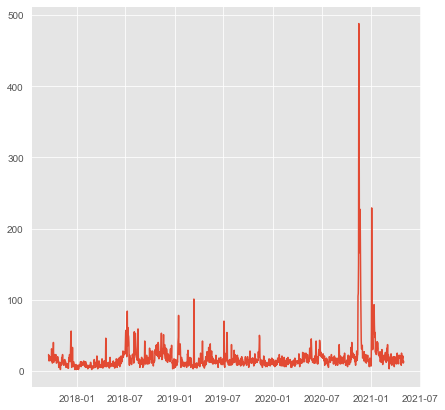

In [77]:
plt.plot(fb_review_count)

In [128]:
fb_ratings = fb_reviews['rating'].groupby(by=fb_reviews['date'].dt.date).mean()

In [132]:
fb_ratings_change = log_returns(fb_ratings)

<ipython-input-55-cdf2d3244229>:7: RuntimeWarning: divide by zero encountered in log
  returns = np.log(returns)


In [133]:
fb_ratings = pd.DataFrame(fb_ratings)
fb_ratings['log_change'] = fb_ratings_change

In [134]:
fb_ratings

,rating,log_change
date,,
2017-09-18,2.695652,-inf
2017-09-19,2.062500,0.267721
2017-09-20,2.357143,-0.133531
2017-09-21,2.047619,0.140773
2017-09-22,1.937500,0.055279
...,...,...
2021-04-28,1.722222,0.044171
2021-04-29,1.857143,-0.075424
2021-04-30,2.000000,-0.074108


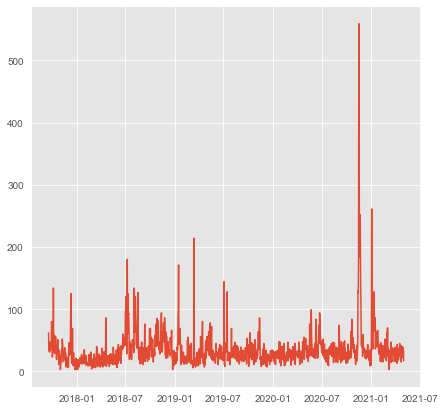

In [79]:
plt.plot(fb_ratings)

## Relationship between Growth and Sentiment

In [80]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

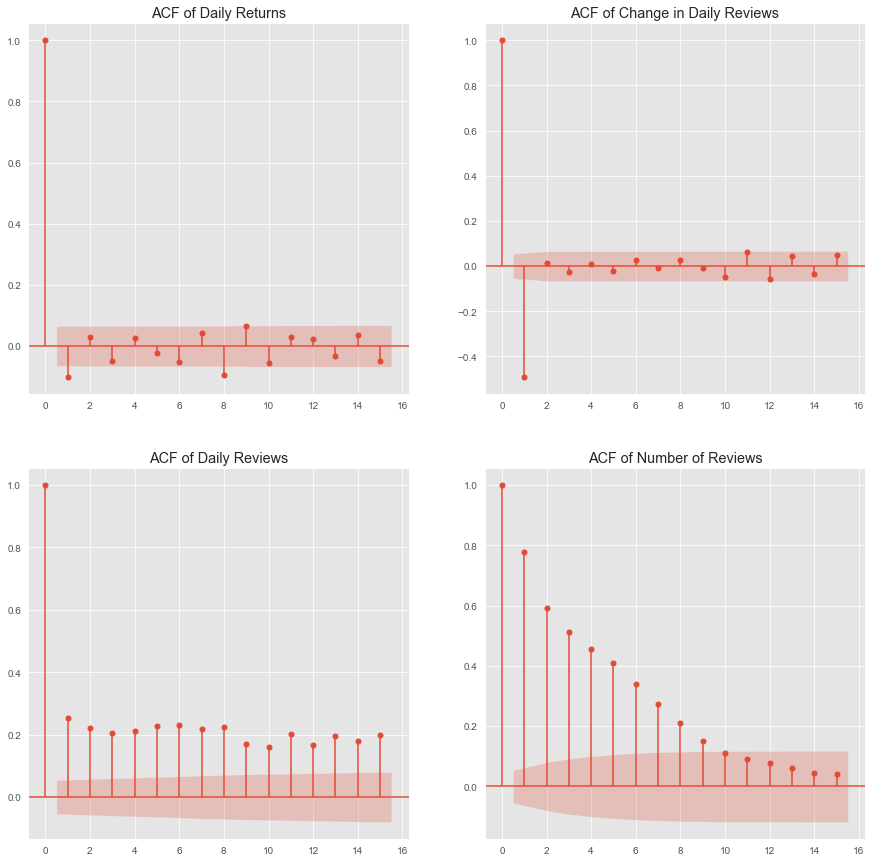

In [135]:
f, axs = plt.subplots(2,2,figsize=(15,15))
plot_acf(FB['daily_returns'][1:], lags=15, title='ACF of Daily Returns', ax=axs[0,0])
plot_acf(fb_ratings['log_change'][1:], title='ACF of Change in Daily Reviews', ax=axs[0,1], lags=15)
plot_acf(fb_ratings['rating'][1:], title='ACF of Daily Reviews', ax=axs[1,0], lags=15)
plot_acf(fb_review_count, title='ACF of Number of Reviews', ax=axs[1,1], lags=15)
plt.show()

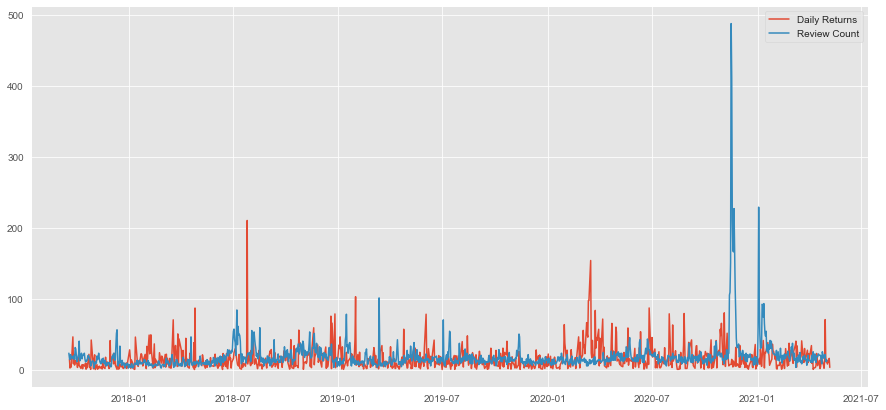

In [123]:
plt.plot(abs(FB['daily_returns']*1000), label = 'Daily Returns')
plt.plot(fb_review_count, label = 'Review Count')
plt.legend()

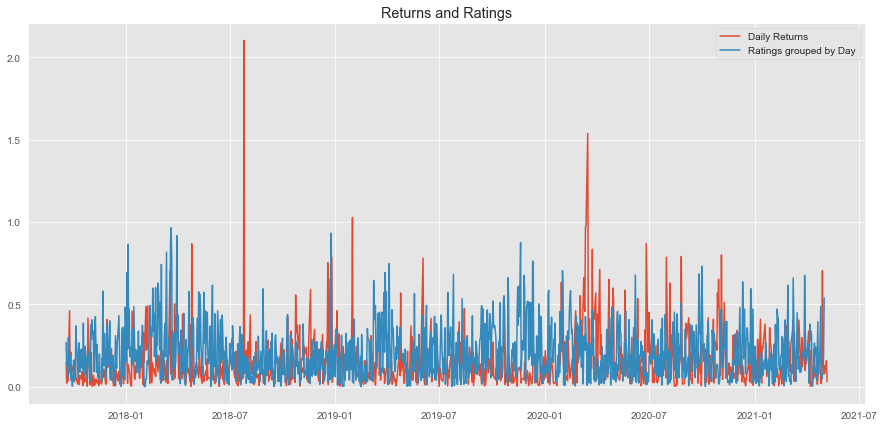

In [137]:
plt.plot(abs(FB['daily_returns']*10), label = 'Daily Returns')
plt.plot(abs(fb_ratings['log_change']), label = 'Ratings grouped by Day')
plt.title('Returns and Ratings')
plt.legend()
plt.show()

## Trying Rolling Windows
This is to see correlation of app ratings with the returns

### Ratings

### 1 Week

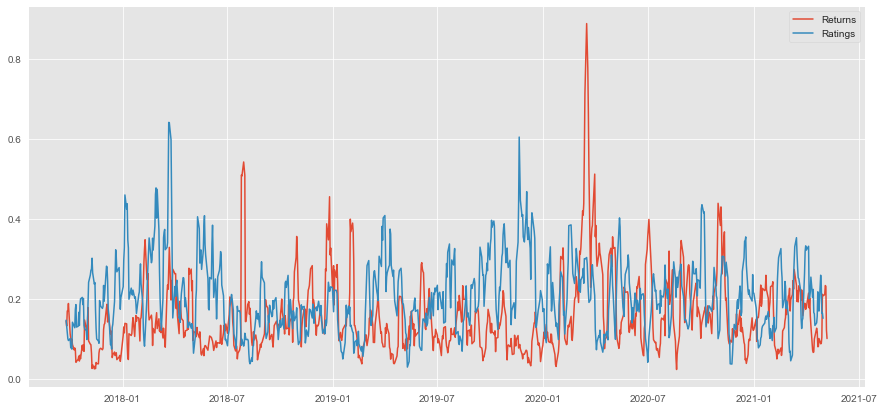

In [204]:
plt.plot(abs(FB['daily_returns']*10).rolling(5).mean(), label='Returns')
plt.plot(abs(fb_ratings['log_change']).rolling(5).mean(), label='Ratings')
plt.legend()

### Fortnight 

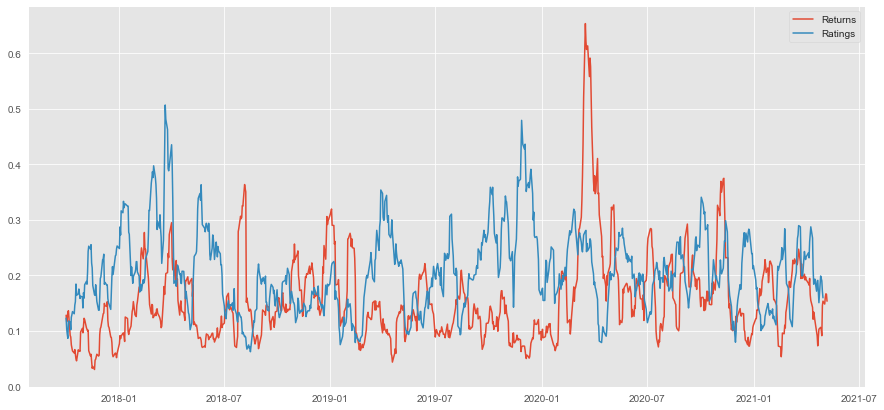

In [203]:
plt.plot(abs(FB['daily_returns']*10).rolling(10).mean(), label='Returns')
plt.plot(abs(fb_ratings['log_change']).rolling(10).mean(), label='Ratings')
plt.legend()

### Monthly

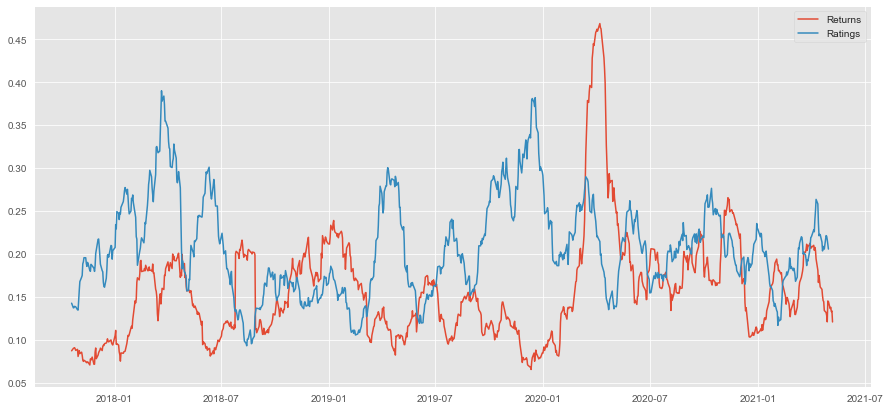

In [202]:
plt.plot(abs(FB['daily_returns']*10).rolling(24).mean(), label='Returns')
plt.plot(abs(fb_ratings['log_change']).rolling(24).mean(), label='Ratings')
plt.legend()